In [ ]:
# !pip install seaborn

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib.pyplot import xticks
from matplotlib.pyplot import yticks
from sklearn.model_selection import train_test_split

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
df = pd.DataFrame(pd.read_csv("/content/drive/MyDrive/DataScience_Dataset/framingham.csv"))
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


In [ ]:
df.shape

(4238, 16)

In [ ]:
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [ ]:
df.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [ ]:
df.shape

(4238, 16)

In [ ]:
zero = df[df['TenYearCHD']==0].iloc[0:557]
one = df[df['TenYearCHD']==1]
df = pd.concat([zero,one]).sample(frac = 1)
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
371,1,55,4.0,0,0.0,0.0,0,1,0,239.0,159.0,102.0,32.35,75.0,71.0,1
364,1,59,2.0,1,15.0,0.0,0,0,0,212.0,106.0,66.0,26.46,85.0,117.0,0
1297,0,55,2.0,1,20.0,0.0,0,0,0,250.0,138.0,87.0,25.33,95.0,NaN,1
344,0,63,1.0,1,20.0,0.0,0,0,0,238.0,136.0,66.0,20.20,60.0,92.0,1
480,0,51,4.0,1,9.0,0.0,0,1,0,320.0,145.0,85.0,24.03,75.0,98.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2336,0,49,1.0,1,9.0,0.0,0,0,0,235.0,109.0,70.0,28.66,74.0,73.0,1
4022,1,60,3.0,1,10.0,0.0,0,1,0,250.0,157.0,94.0,29.89,63.0,68.0,1
840,0,59,1.0,0,0.0,0.0,0,0,0,241.0,120.0,73.0,23.76,60.0,88.0,1
3070,0,41,1.0,1,5.0,0.0,0,0,0,192.0,123.0,72.0,19.16,62.0,90.0,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1201 entries, 371 to 612
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             1201 non-null   int64  
 1   age              1201 non-null   int64  
 2   education        1172 non-null   float64
 3   currentSmoker    1201 non-null   int64  
 4   cigsPerDay       1198 non-null   float64
 5   BPMeds           1185 non-null   float64
 6   prevalentStroke  1201 non-null   int64  
 7   prevalentHyp     1201 non-null   int64  
 8   diabetes         1201 non-null   int64  
 9   totChol          1187 non-null   float64
 10  sysBP            1201 non-null   float64
 11  diaBP            1201 non-null   float64
 12  BMI              1191 non-null   float64
 13  heartRate        1200 non-null   float64
 14  glucose          1099 non-null   float64
 15  TenYearCHD       1201 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 159.5 KB


In [ ]:
# Checking Null values
df.isnull().sum()
# There are no NULL values in the dataset, hence it is clean.

male                 0
age                  0
education           29
currentSmoker        0
cigsPerDay           3
BPMeds              16
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             14
sysBP                0
diaBP                0
BMI                 10
heartRate            1
glucose            102
TenYearCHD           0
dtype: int64

In [ ]:
df = df.dropna()

In [ ]:
# EDA

In [ ]:
auto=df

In [ ]:
auto

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
371,1,55,4.0,0,0.0,0.0,0,1,0,239.0,159.0,102.0,32.35,75.0,71.0,1
364,1,59,2.0,1,15.0,0.0,0,0,0,212.0,106.0,66.0,26.46,85.0,117.0,0
344,0,63,1.0,1,20.0,0.0,0,0,0,238.0,136.0,66.0,20.20,60.0,92.0,1
480,0,51,4.0,1,9.0,0.0,0,1,0,320.0,145.0,85.0,24.03,75.0,98.0,0
173,0,39,3.0,1,12.0,0.0,0,0,0,200.0,111.0,64.0,19.24,68.0,60.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2336,0,49,1.0,1,9.0,0.0,0,0,0,235.0,109.0,70.0,28.66,74.0,73.0,1
4022,1,60,3.0,1,10.0,0.0,0,1,0,250.0,157.0,94.0,29.89,63.0,68.0,1
840,0,59,1.0,0,0.0,0.0,0,0,0,241.0,120.0,73.0,23.76,60.0,88.0,1
3070,0,41,1.0,1,5.0,0.0,0,0,0,192.0,123.0,72.0,19.16,62.0,90.0,1


In [ ]:
# Dimension reduction

In [ ]:
auto.corr()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
male,1.000000,-0.073600,0.053394,0.219747,0.339727,-0.079461,0.012442,-0.037009,0.001580,-0.088351,-0.067872,0.019904,0.013903,-0.070065,-0.006262,0.141085
age,-0.073600,1.000000,-0.158963,-0.245636,-0.217108,0.124071,0.061704,0.323844,0.117879,0.228407,0.400373,0.190669,0.153255,0.009864,0.131000,0.339565
education,0.053394,-0.158963,1.000000,0.036812,0.056409,0.036649,-0.045945,-0.076361,-0.059855,0.039510,-0.110596,-0.037661,-0.135011,-0.047123,-0.035506,-0.087721
currentSmoker,0.219747,-0.245636,0.036812,1.000000,0.777226,-0.080571,-0.029812,-0.156197,-0.055313,-0.072891,-0.147940,-0.118828,-0.162295,0.060206,-0.061403,0.007556
cigsPerDay,0.339727,-0.217108,0.056409,0.777226,1.000000,-0.075016,-0.044013,-0.120029,-0.056822,-0.064156,-0.112370,-0.083247,-0.111477,0.093051,-0.048431,0.051497
BPMeds,-0.079461,0.124071,0.036649,-0.080571,-0.075016,1.000000,0.065831,0.276589,0.086741,0.125120,0.295034,0.210893,0.074994,0.073871,0.102776,0.098735
prevalentStroke,0.012442,0.061704,-0.045945,-0.029812,-0.044013,0.065831,1.000000,0.070983,0.024311,-0.010669,0.060782,0.059194,0.003386,0.007448,0.016437,0.040160
prevalentHyp,-0.037009,0.323844,-0.076361,-0.156197,-0.120029,0.276589,0.070983,1.000000,0.100331,0.144044,0.697971,0.609688,0.313283,0.163268,0.131441,0.259366
diabetes,0.001580,0.117879,-0.059855,-0.055313,-0.056822,0.086741,0.024311,0.100331,1.000000,0.067601,0.096645,0.058037,0.110678,0.090346,0.712791,0.104071
totChol,-0.088351,0.228407,0.039510,-0.072891,-0.064156,0.125120,-0.010669,0.144044,0.067601,1.000000,0.184082,0.124557,0.112505,0.067135,0.094370,0.129370


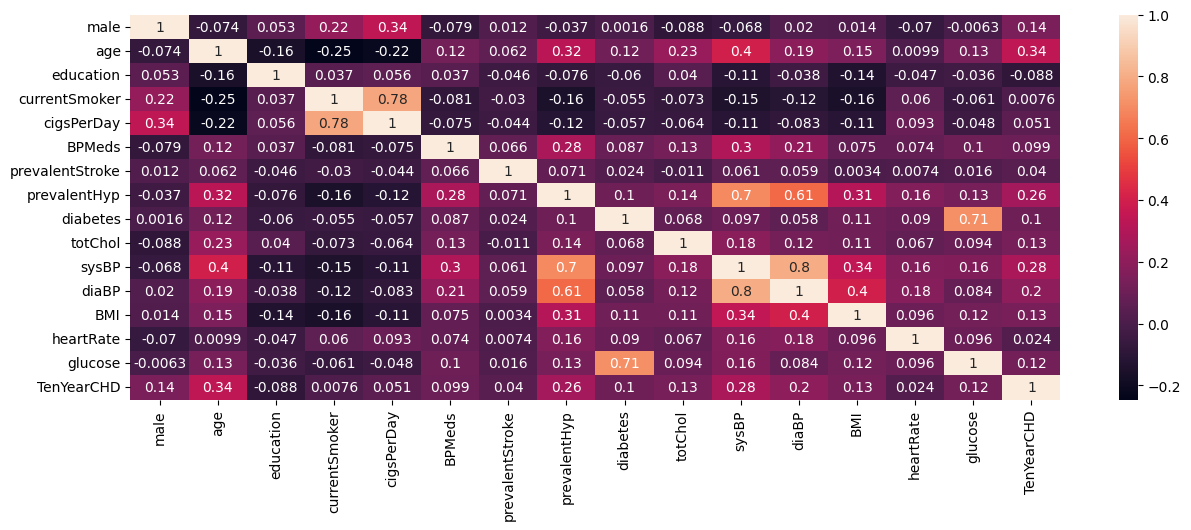

In [ ]:
# Starting machine learning
import seaborn as sns
plt.figure(figsize=(15,5))
sns.heatmap(auto.corr(),annot=True)
plt.show()

In [ ]:
# Starting ANN

In [ ]:
yy = auto[['TenYearCHD']]
XX = auto.drop(['TenYearCHD'],axis = 1)

In [ ]:
XX.shape

(1045, 15)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

XX = scaler.fit_transform(XX)
yy = scaler.fit_transform(yy.values.reshape(-1 , 1))

In [ ]:
X_train , X_test , y_train , y_test = train_test_split(XX, yy , test_size = 0.05 , random_state = 1)

In [ ]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
# from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

import warnings
warnings.filterwarnings("ignore")

In [ ]:
model = Sequential()
model.add(Dense(15, activation='relu', input_dim=15))
# model.add(Dense(10, activation='relu'))
# model.add(Dense(5, activation='relu'))
# model.add(Dense(2, activation='relu'))
model.add(Dense(1, activation='relu'))

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
model.summary()

history = model.fit(X_train , y_train , epochs = 1000 , validation_split= 0.30)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 15)                240       
                                                                 
 dense_1 (Dense)             (None, 1)                 16        
                                                                 
Total params: 256 (1.00 KB)
Trainable params: 256 (1.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/1000
22/22 [==============================] - 1s 13ms/step - loss: 0.2365 - accuracy: 0.6153 - val_loss: 0.2366 - val_accuracy: 0.6141
Epoch 2/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.2234 - accuracy: 0.6556 - val_loss: 0.2310 - val_accuracy: 0.6309
Epoch 3/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.2157 - accuracy: 0.6671 - val_loss: 0.2276 - val_accuracy: 0.

In [ ]:
history.history

{'loss': [0.47781530022621155,
  0.3693614900112152,
  0.28636324405670166,
  0.2516682744026184,
  0.24044351279735565,
  0.2335013598203659,
  0.22707325220108032,
  0.2228519171476364,
  0.2192351222038269,
  0.21698252856731415,
  0.2146880030632019,
  0.21278606355190277,
  0.21144667267799377,
  0.21030595898628235,
  0.20917969942092896,
  0.2082565277814865,
  0.20755857229232788,
  0.20700211822986603,
  0.2065785825252533,
  0.20549464225769043,
  0.20475557446479797,
  0.20416033267974854,
  0.20384915173053741,
  0.20307482779026031,
  0.2034814953804016,
  0.2022130787372589,
  0.20166689157485962,
  0.20143091678619385,
  0.20101763308048248,
  0.2007913440465927,
  0.20092828571796417,
  0.20008601248264313,
  0.19985230267047882,
  0.19944480061531067,
  0.1997143030166626,
  0.19907528162002563,
  0.19918042421340942,
  0.1987229734659195,
  0.1982656717300415,
  0.19813884794712067,
  0.19840018451213837,
  0.19860123097896576,
  0.19787675142288208,
  0.1981194168329

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


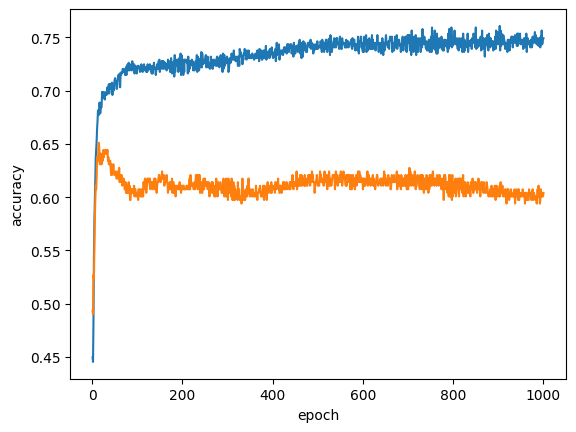

In [ ]:

# list all data in history
print(history.history.keys())
tx = [i for i in range(1,1001)]
ty = history.history['accuracy']
ty1 = history.history['val_accuracy']
# summarize history for accuracy
plt.plot(tx,ty)
plt.plot(tx,ty1)

plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()



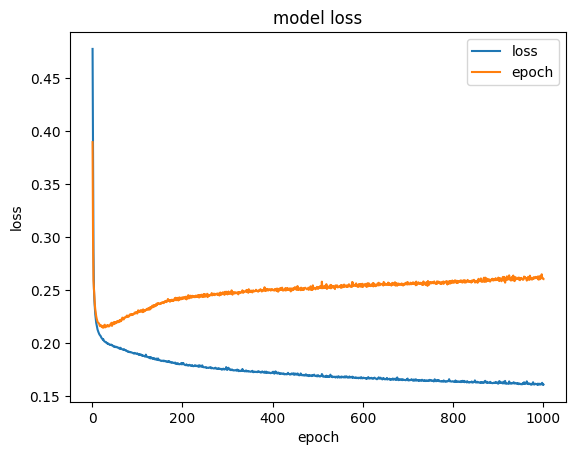

In [ ]:
#summarize history for loss
tx = [i for i in range(1,1001)]
ty = history.history['loss']
ty1 = history.history['val_loss']
plt.plot(tx,ty)
plt.plot(tx,ty1)
plt.title('model loss')
plt.legend(['loss', 'epoch'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
test = model.evaluate(X_test, y_test) # gives loss and accuracy
print(test)

2/2 [==============================] - 0s 9ms/step - loss: 0.2331 - accuracy: 0.6981
[0.23306342959403992, 0.698113203048706]


In [ ]:
# serialize weights to HDF5
model.save("model.h5")

In [ ]:
from tensorflow.keras.models import load_model
# from tensorflow.keras.models import model_from_json
# with open('day1.json', 'r') as f:
#     model_loaded = model_from_json(f.read())
# Load weights into the new model
model_loaded = load_model('/content/model.h5')

In [ ]:
X_test[10:11]

array([[0.        , 0.47222222, 0.33333333, 1.        , 0.33333333,
        0.        , 0.        , 0.        , 0.        , 0.29621849,
        0.12529551, 0.2826087 , 0.23557925, 0.33333333, 0.13559322]])

In [ ]:
model_loaded.predict(X_test[10:11])

1/1 [==============================] - 0s 30ms/step


array([[0.70697427]], dtype=float32)

In [ ]:
y_test[10:11]

array([[0.]])